<a href="https://colab.research.google.com/github/jeangomes/mvp-pos-sprint1/blob/main/MVP_Pos_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Pós Graduação em Data Science - Sprint I: Análise de Dados e Boas Práticas

## Contexto e definição do problema
Estou utilizando um dataset do Kaggle, sobre bullyng nas escolas, os dados são o resultado de uma pesquisa na Argentina com mais de 50 mil estudantes.
O objetivo é identificar que atributos favorecem mais os casos de bullyng entre os alunos, e prever possíveis novos casos.
Podemos enquadrar em problemas de aprendizado supervisionado.

Para mais detalhes, consulte a página do dataset no Kaggle: [Link](https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools)

**Descrição dos atributos/colunas:**
1. **record** - Índice númerico dos registros, sem relevância, a coluna será removida
2. **Bullied_on_school_property_in_past_12_months** - Bullyng na escola nos últimos 12 meses
3. **Bullied_not_on_school_property_in_past_12_months** - Bullyng fora da escola nos últimos 12 meses 
4. **Cyber_bullied_in_past_12_months** - Bullyng virtual nos últimos 12 meses 
5. **Custom_Age** - Idade dos alunos
6. **Sex** - Sexo dos alunos
7. **Physically_attacked** - Atacado fisicamente
8. **Physical_fighting** - Luta física
9. **Felt_lonely** - Se senti sozinho
10. **Close_friends** - Amigos próximos 
11. **Miss_school_no_permission** - Perder escola sem permissão
12. **Other_students_kind_and_helpful** - Outros alunos gentis e prestativos 
13. **Parents_understand_problems** - Os pais entendem os problemas
14. **Most_of_the_time_or_always_felt_lonely** - Na maioria das vezes ou sempre me senti sozinho
15. **Missed_classes_or_school_without_permission** - Perdeu aulas ou escola sem permissão 
16. **Were_underweight** - Estavam abaixo do peso
17. **Were_overweight** - Estavam acima do peso
18. **Were_obese** - Eram obesos

## Importação de bibliotecas, leitura e carga do dataset para um dataframe

In [346]:
# importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

Na função read_csv usarei o parâmetro **na_values** para valores adicionais serem reconhecidos como null (NA/NaN) 

In [310]:
# importando dados a partir de uma url de um arquivo CSV para um dataframe

# url do arquivo com os dados para importar
url_dados = 'https://raw.githubusercontent.com/jeangomes/mvp-pos-sprint1/main/Bullying_2018.csv'

na_values_list = ["-", " "]

# carga do dataset através da leitura da url
df_original = pd.read_csv(url_dados, na_values=na_values_list, sep=";", engine='python')

## Verificações e **análise exploratória de dados** sobre a estrutura e composição do dataframe antes de tratar os dados

In [311]:
# verificando que df é um dataframe
type(df_original)

pandas.core.frame.DataFrame

In [312]:
# verificando os tipos das colunas do dataframe
df_original.dtypes

record                                               int64
Bullied_on_school_property_in_past_12_months        object
Bullied_not_on_school_property_in_past_12_months    object
Cyber_bullied_in_past_12_months                     object
Custom_Age                                          object
Sex                                                 object
Physically_attacked                                 object
Physical_fighting                                   object
Felt_lonely                                         object
Close_friends                                       object
Miss_school_no_permission                           object
Other_students_kind_and_helpful                     object
Parents_understand_problems                         object
Most_of_the_time_or_always_felt_lonely              object
Missed_classes_or_school_without_permission         object
Were_underweight                                    object
Were_overweight                                     obje

In [313]:
# exibindo as primeiras linhas
df_original.head(5)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


In [314]:
# exibindo as últimas linhas
df_original.tail(15)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
56966,57081,Yes,No,No,16 years old,Male,0 times,0 times,Rarely,3 or more,1 or 2 days,Rarely,Sometimes,No,Yes,No,No,No
56967,57082,No,Yes,No,16 years old,Male,2 or 3 times,0 times,Rarely,2,0 days,Rarely,Most of the time,No,No,No,No,No
56968,57083,No,No,No,16 years old,Male,0 times,0 times,Sometimes,2,3 to 5 days,Rarely,Never,No,Yes,NaN,NaN,NaN
56969,57084,No,No,No,16 years old,Male,0 times,0 times,Never,3 or more,0 days,Never,Never,No,No,No,No,No
56970,57085,No,No,No,16 years old,Male,0 times,0 times,Sometimes,3 or more,1 or 2 days,Most of the time,Rarely,No,Yes,NaN,NaN,NaN
56971,57086,Yes,Yes,No,16 years old,Male,0 times,0 times,Most of the time,3 or more,0 days,Sometimes,Rarely,Yes,No,No,No,No
56972,57087,No,Yes,No,16 years old,Male,0 times,0 times,Rarely,3 or more,3 to 5 days,Rarely,Most of the time,No,Yes,No,No,No
56973,57088,No,No,No,16 years old,Male,0 times,0 times,Rarely,2,3 to 5 days,Sometimes,Rarely,No,Yes,NaN,NaN,NaN
56974,57089,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
56975,57090,No,No,Yes,15 years old,Male,12 or more times,2 or 3 times,Rarely,3 or more,0 days,Most of the time,Sometimes,No,No,No,No,No


In [315]:
# exibindo os nomes das colunas
df_original.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')

In [316]:
# exibindo as dimensões do dataset
df_original.shape

(56981, 18)

In [317]:
# exibindo a quantidade de linhas por coluna
df_original.count()

record                                              56981
Bullied_on_school_property_in_past_12_months        55742
Bullied_not_on_school_property_in_past_12_months    56492
Cyber_bullied_in_past_12_months                     56410
Custom_Age                                          56873
Sex                                                 56445
Physically_attacked                                 56741
Physical_fighting                                   56713
Felt_lonely                                         56615
Close_friends                                       55905
Miss_school_no_permission                           55117
Other_students_kind_and_helpful                     55422
Parents_understand_problems                         54608
Most_of_the_time_or_always_felt_lonely              56615
Missed_classes_or_school_without_permission         55117
Were_underweight                                    36052
Were_overweight                                     36052
Were_obese    

In [318]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      55742 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56492 non-null  object
 3   Cyber_bullied_in_past_12_months                   56410 non-null  object
 4   Custom_Age                                        56873 non-null  object
 5   Sex                                               56445 non-null  object
 6   Physically_attacked                               56741 non-null  object
 7   Physical_fighting                                 56713 non-null  object
 8   Felt_lonely                                       56615 non-null  object
 9   Close_friends               

In [319]:
# exibindo um sumário estatístico
df_original.describe()

,record
count,56981.000000
mean,28535.389832
std,16479.971553
min,1.000000
25%,14263.000000
50%,28522.000000
75%,42804.000000
max,57095.000000


In [320]:
# verificando nulls no dataset
df_original.isnull().sum()

# Antes de usar o parametro "na_values" na leitura do csv, era necessário usar o comando abaixo para identificar os valores ausentes.
#df.isin([' ']).sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

## Config de cores para gráficos

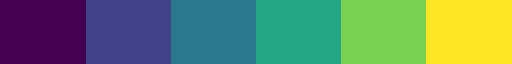

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [321]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

## Pré-Processamento de Dados
### Operações nas colunas - Renomeando e convertendo/transformando algumas.

Renomeando as colunas de inglês para português e copiando para um novo dataframe

In [322]:
# Usando o rename para renomear as colunas
dados = df_original.rename(columns={
  'Bullied_on_school_property_in_past_12_months': 'Bullying na escola',
  'Bullied_not_on_school_property_in_past_12_months': 'Bullying fora da escola', 
  'Cyber_bullied_in_past_12_months' : 'Bullying virtual',
  'Custom_Age': 'Idade',
  'Sex': 'Sexo',
  'Physically_attacked': 'Atacado fisicamente',
  'Physical_fighting': 'Luta física',
  #'Felt_lonely': 'Se sente sozinho',
  #'Close_friends': 'Amigos próximos',
  'Miss_school_no_permission': 'Qtd faltas sem permissão',
  'Other_students_kind_and_helpful': 'Alunos gentis',
  'Parents_understand_problems': 'Pais entendem',
  'Most_of_the_time_or_always_felt_lonely': 'Se sente muito sozinho',
  'Missed_classes_or_school_without_permission': 'Falta sem permissão',
  'Were_underweight': 'Abaixo do peso',
  'Were_overweight': 'Acima do peso',
  'Were_obese': 'Obeso'
})

In [323]:
# Removendo coluna desnecessária
dados.drop(['record'], axis=1, inplace= True)

# Removendo string da coluna
dados['Close_friends'] = dados['Close_friends'].str.replace(' or more', '')

# remove strings da coluna de idade e mantem somente digitos
dados['Idade'] = dados['Idade'].str.replace(r'\D+','', regex=True)

In [324]:
# convertendo valores com string vazias para numpy nan
#dados.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# Com o uso do parametro "na_values" na leitura do csv, não vai ser mais necessário

Como a coluna idade é a que tem a menor quantidade de valores ausentes, optei em tratar ela, substituindo os missing pela média do restante

In [325]:
# Transforma idade em int e define as idades ausentes como a média do restante
dados['Idade'] = dados['Idade'].replace(np.nan, 0)
dados['Idade'] = dados['Idade'].astype(int)
idade_media = round(dados['Idade'].mean())
dados['Idade'] = dados['Idade'].replace(0, idade_media)

In [326]:
#dados.isin([' ']).sum()
dados.isnull().sum()

Bullying na escola           1239
Bullying fora da escola       489
Bullying virtual              571
Idade                           0
Sexo                          536
Atacado fisicamente           240
Luta física                   268
Felt_lonely                   366
Close_friends                1076
Qtd faltas sem permissão     1864
Alunos gentis                1559
Pais entendem                2373
Se sente muito sozinho        366
Falta sem permissão          1864
Abaixo do peso              20929
Acima do peso               20929
Obeso                       20929
dtype: int64

Tratamento de duas colunas:
- **Felt_lonely**, que indica a frequencia que o aluno se sente sozinho.
- **Pais entendem**, que indica o quanto os pais ententem os filhos.

Como os valores estão em inglês, é feita uma substituição das expressões para português.

In [327]:
# Replace nos valores de uma coluna - traduzindo os valores
dict_frequencias_traducao = {'Never': 'Nunca', 'Sometimes': 'Às vezes', 'Rarely': 'Raramente', 'Most of the time': 'Frequentemente', 'Always': 'Sempre'}
dados['Felt_lonely'] = dados['Felt_lonely'].replace(dict_frequencias_traducao)
dados['Pais entendem'] = dados['Pais entendem'].replace(dict_frequencias_traducao)

In [328]:
#for col in dados.columns:
#    percent_missing_value = (dados[col].isnull().sum()/dados.shape[0]) * 100
#    print("Percent of missing values for the column ", col, " is ", percent_missing_value)

Mantive a transformação abaixo, de uma coluna quantitativa textual em indices númericos, mas foi possível gerar um histograma (12º gráfico) para uma coluna string, funcionalidade experimental do seaborn.

In [329]:
value_counts = dados['Atacado fisicamente'].value_counts()

# Print the distribution
print(value_counts) # verificar transformações
# cria um dicionario para mapear as categorias em valor numerico
mapping = {'0 times': 0, '1 time': 1, '2 or 3 times': 2, '4 or 5 times': 3, '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7}
# cria nova coluna com valores numericos mapeados
dados['amount_attacks'] = dados['Atacado fisicamente'].map(mapping)

0 times             46997
1 time               5248
2 or 3 times         2405
12 or more times      790
4 or 5 times          695
6 or 7 times          302
8 or 9 times          189
10 or 11 times        115
Name: Atacado fisicamente, dtype: int64


## Plotando alguns gráficos com algumas análises e comparações

### 1 º  Gráfico - Porcentagem de respostas positivas e negativas para as 3 classificações de ocorrência de bullying

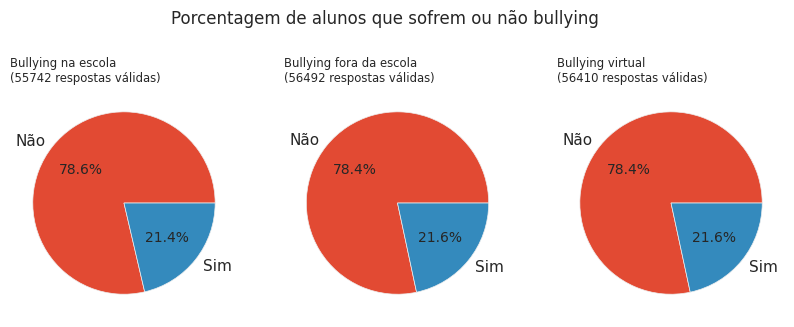

In [330]:
colunas_bullying = ['Bullying na escola', 'Bullying fora da escola', 'Bullying virtual']
# Criando a figura e os subgraficos/axes
num_charts = len(colunas_bullying)
fig, axes = plt.subplots(1, num_charts,figsize=(10, 4))

# Gerandos os pie charts dinamicamente para as 3 colunas selecionadas
 
for index in range(len(colunas_bullying)): 
    column = colunas_bullying[index]
    bullying_count = dados[column].value_counts()
    bullying_count.rename({'No': 'Não', 'Yes': 'Sim'}, inplace=True)
    ax = axes[index]
    ax.pie(bullying_count.values, labels=bullying_count.index, autopct='%1.1f%%')
    ax.set_aspect('equal')
    ax.set_title(bullying_count.name + "\n("+str(bullying_count.sum())+" respostas válidas)", loc='left', fontsize='small')  

fig.suptitle('Porcentagem de alunos que sofrem ou não bullying')
plt.show()

➡ Com esses gráficos podemos observar que infelizmente a porcentagem de alunos que sofrem bullying é relevante. 

### 2º Gráfico - Divisão do gênero dos alunos que participaram da pesquisa por sexo


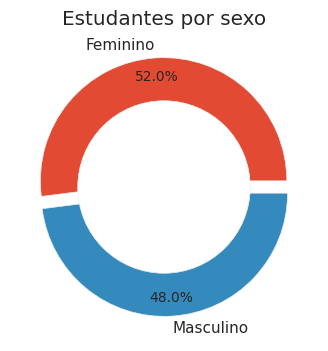

In [331]:
grouped_data = dados.groupby('Sexo')['Sexo'].count()
percentage_data = grouped_data / grouped_data.sum() * 100
percentage_data = percentage_data.rename(index={' ': 'Desconhecido', 'Female': 'Feminino', 'Male': 'Masculino'})
labels = percentage_data.index
quantidade = percentage_data.values

plt.figure(figsize=(6, 4))
# explosão/separação das fatias
explode = (0.05, 0.05)
  
plt.pie(quantidade, labels=labels,autopct='%1.1f%%', pctdistance=0.85,explode=explode)
  
# desenha um circulo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# adiciona o circulo ao chart
fig.gca().add_artist(centre_circle)
  
plt.title('Estudantes por sexo')
plt.show()

➡ A maioria dos alunos que participaram da pesquisa são do sexo feminino.

### 3º Gráfico - Barras horizontal mostrando a relação entre o gênero que mais sofre bullying

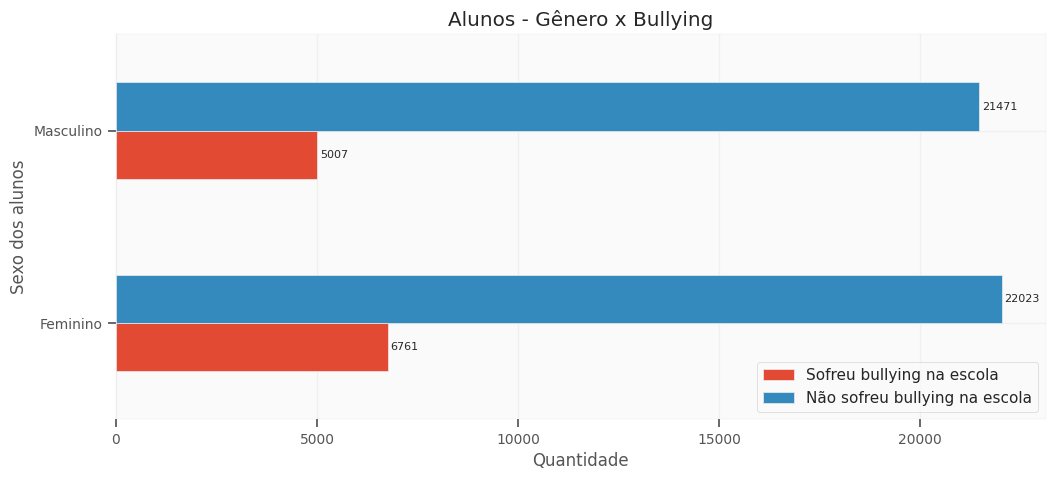

In [332]:
dadosNotBullyng = dados[dados['Bullying na escola'] == 'No']
qtdFemMasNotBullyng = dadosNotBullyng['Sexo'].value_counts().sort_index(ascending=True)

dadosBullyng = dados[dados['Bullying na escola'] == 'Yes']
qtdFemMasBullyng = dadosBullyng['Sexo'].value_counts().sort_index(ascending=True)

dataFxM = {'category': ['Feminino', 'Masculino'], 'Sofreu bullying na escola': qtdFemMasBullyng.array, 'Não sofreu bullying na escola': qtdFemMasNotBullyng.array}
df_sex_bullying_or_not = pd.DataFrame(dataFxM)
df_sex_bullying_or_not.set_index('category', inplace=True)

# plotando um grafico a partir da estrutura de dados, nesse caso um dataframe
ax = df_sex_bullying_or_not.plot(kind='barh', rot=0, figsize = (12, 5), fontsize=10)

# definindo títulos
plt.title('Alunos - Gênero x Bullying')
plt.xlabel('Quantidade')
plt.ylabel('Sexo dos alunos')

# adiciona labels nas barras
for i in ax.containers:
  ax.bar_label(i, label_type='edge', padding=2, fontsize=8)

plt.show()

➡ Podemos observar que tem mais alunos do sexo feminino que sofrem bullying, pode ser proporcional, já que a maior parte dos participantes são meninas.

### 4º Gráfico - exibindo a relação de alunos por idade

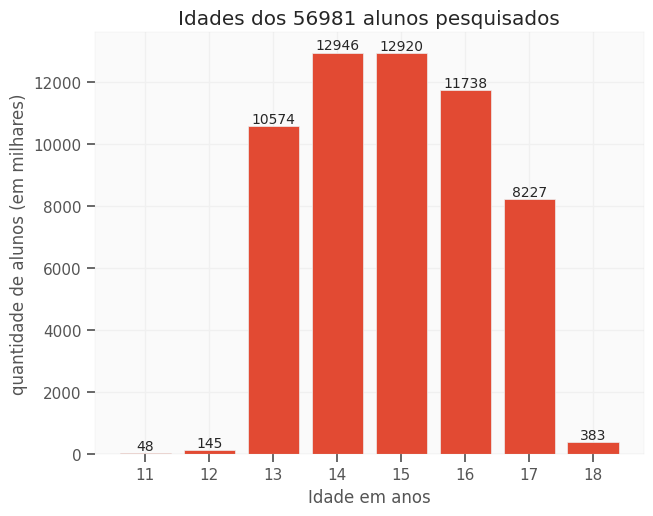

In [333]:
# ordenando e agrupando o dataframe pela coluna de idade
group_by_age = dados.sort_values(by='Idade', ascending=False).groupby('Idade')['Idade'].count()
group_by_age = group_by_age.rename(index={'': 'Ausente'})

# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots()

# Plota o gráfico de barras
ax.bar(x = group_by_age.index, height = group_by_age.values)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0])

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Acrescenta um título ao gráfico
plt.title("Idades dos " + str(dados.shape[0]) +" alunos pesquisados")

# Define os rótulos dos eixos
plt.xlabel('Idade em anos')
plt.ylabel('quantidade de alunos (em milhares)')

# Exibe o gráfico
plt.show()

➡ Quantidade de alunos por idade

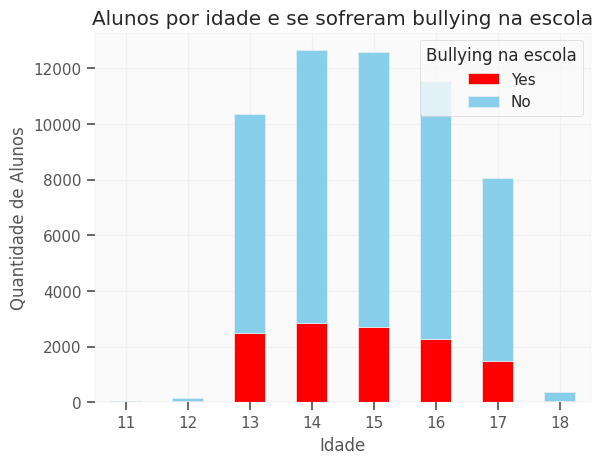

In [334]:
# ordenando e agrupando o dataframe pela coluna de idade
group_by_age = dados.sort_values(by='Idade', ascending=False).groupby(['Bullying na escola', 'Idade'])['Idade'].count()
pivot = group_by_age.unstack(level=0)
pivot[['Yes', 'No']].plot(kind='bar', stacked=True, rot=0, color=['red', 'skyblue'])
plt.xlabel('Idade')
plt.ylabel('Quantidade de Alunos')
plt.title('Alunos por idade e se sofreram bullying na escola')
plt.show()

### 5º Gráfico - Respostas positivas e negativas para algumas perguntas

In [335]:
colunas = ['Bullying na escola', 'Bullying fora da escola', 'Bullying virtual', 'Abaixo do peso', 'Acima do peso', 'Obeso']
# contando os unicos valores das respostas (Yes ou No) para as colunas acima
respostas_positivas_negativas = dados.loc[:, colunas].apply(pd.Series.value_counts)

# Separando as respostas positivas e negativas, e as colunas. Convertendo para tupla para usar no gráfico abaixo.
respostasYes = respostas_positivas_negativas.filter(items=['Yes'], axis=0).to_numpy()[0].tolist()
respostasYes = tuple(respostasYes)
respostasNo = respostas_positivas_negativas.filter(items=['No'], axis=0).to_numpy()[0].tolist()
respostasNo = tuple(respostasNo)
perguntas = tuple(respostas_positivas_negativas.columns)

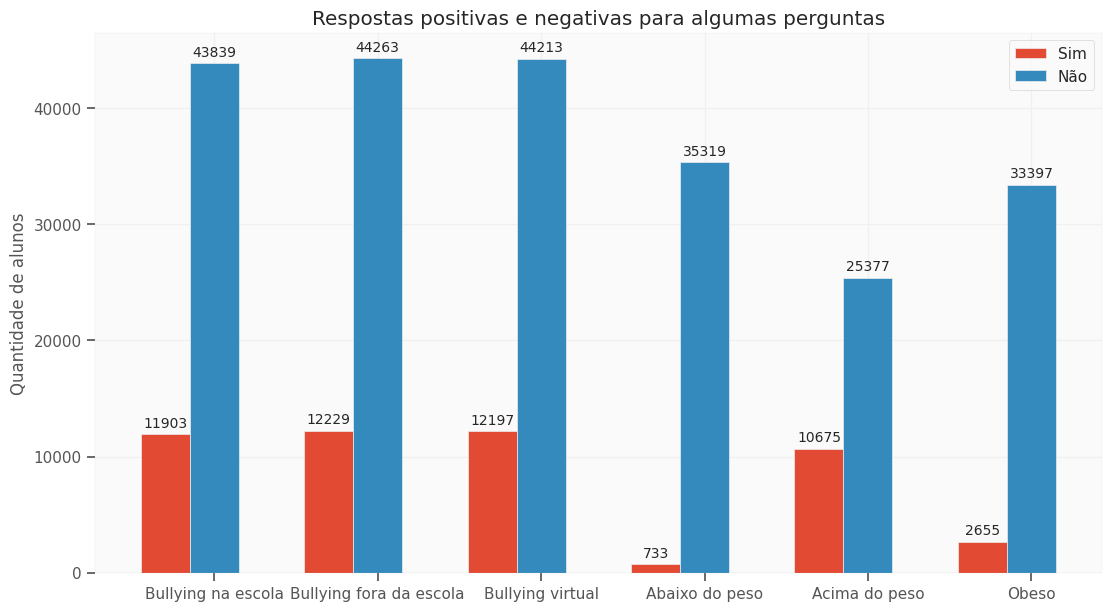

In [336]:
# Gráfico de barras agrupadas com rótulos
respontas = {'Sim': respostasYes,'Não': respostasNo}

x = np.arange(len(perguntas))
width = 0.30
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (11, 6))

for attribute, measurement in respontas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Adicionando títulos e labels
ax.set_ylabel('Quantidade de alunos')
ax.set_title('Respostas positivas e negativas para algumas perguntas')
ax.set_xticks(x + width, perguntas)
ax.legend(loc='upper right')

plt.show()

➡ As ocorrências de bullying possuem uma quantidade aproximada entre os 3 ambientes.

As 3 últimas colunas tem uma certa taxa de valores ausentes, percebida pela quantidade de respostas para essas perguntas.

### 6º Gráfico - Respostas positivas para algumas perguntas

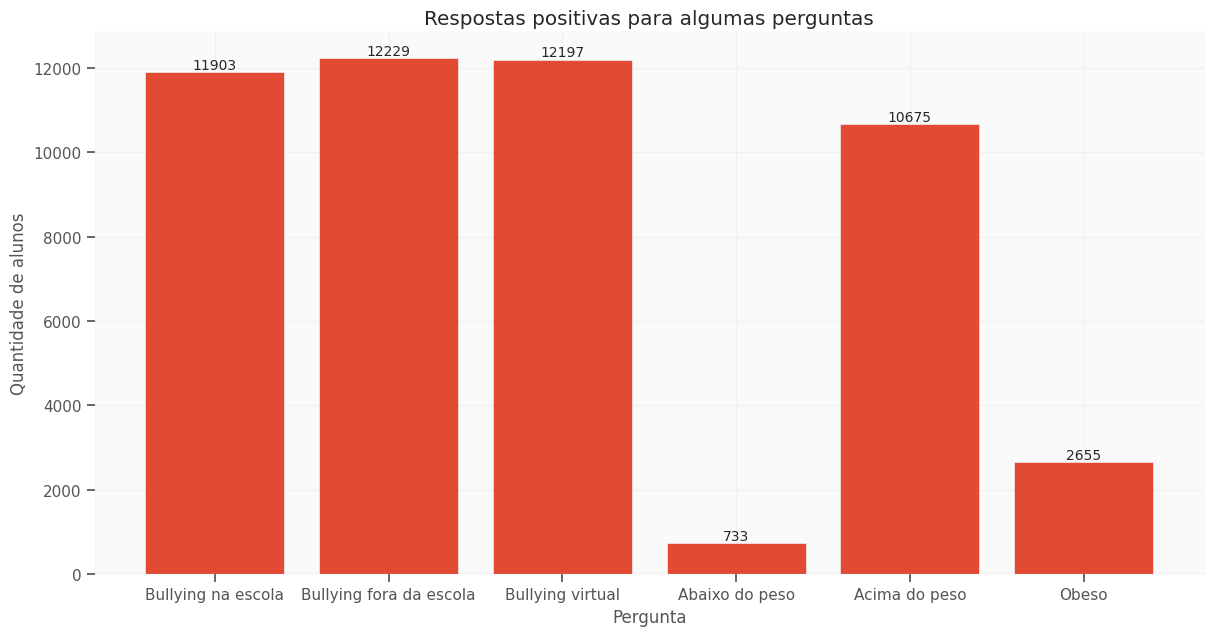

In [337]:
# Criando um dicionário que mapeie nomes de colunas para funções de agregação
agg_dict = {
  'Bullying na escola': lambda x: (x == 'Yes').sum(),
  'Bullying fora da escola': lambda x: (x == 'Yes').sum(),
  'Bullying virtual': lambda x: (x == 'Yes').sum(),
  'Abaixo do peso': lambda x: (x == 'Yes').sum(),
  'Acima do peso': lambda x: (x == 'Yes').sum(),
  'Obeso': lambda x: (x == 'Yes').sum()
}

# Aplicando agregação e atribuindo o resultado
counts = dados.agg(agg_dict)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 6))

# Plota o gráfico de barras
ax.bar(x = counts.index, height = counts.values)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0]) # formatação do número com uma casa decimal

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Acrescenta um título ao gráfico
plt.title("Respostas positivas para algumas perguntas")

# Define os rótulos dos eixos
plt.ylabel('Quantidade de alunos')
plt.xlabel('Pergunta') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

➡ Incidência de respotas positivas para algumas pergutas.

### 7º Gráfico - Porcentagem de respostas do quanto os pais entendem os problemas.

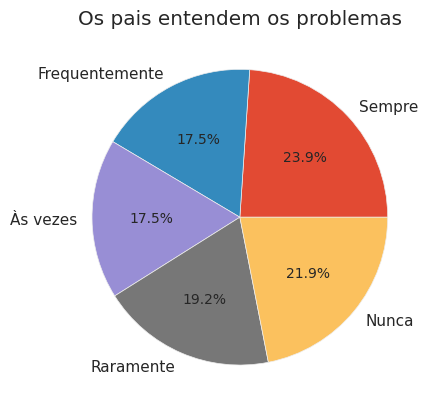

In [338]:
value_counts = dados['Pais entendem'].value_counts()
name_order = ['Sempre', 'Frequentemente', 'Às vezes', 'Raramente', 'Nunca']
value_counts.sort_index(key=lambda x : pd.Categorical(x, categories=name_order),inplace=True)

fig, ax = plt.subplots()
ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax.set_title('Os pais entendem os problemas')
plt.show()

➡ Distribuição percentual das frequências do quanto os pais entendem os problemas dos filhos, podemos notar que **nunca** e **raramente** juntos somam mais de 40%, o que pode indicar a falta de uma melhor comunicação e interação entre pais e filhos. 

### 8º Gráfico - Respostas do quanto o aluno se sente sozinho

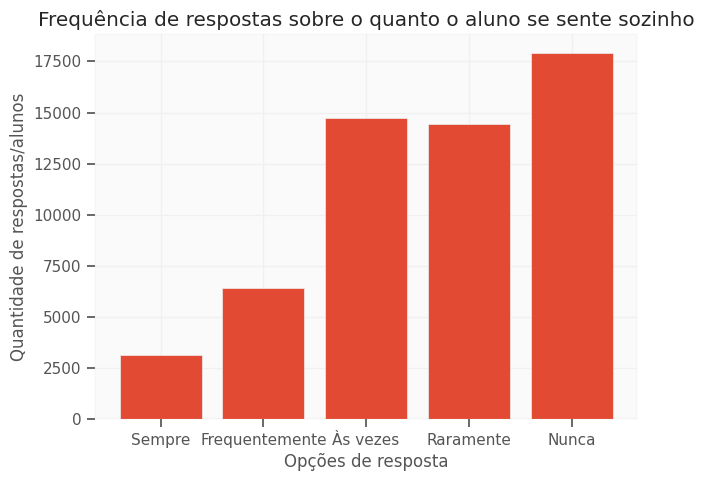

In [339]:
count_unique_values_FL = dados['Felt_lonely'].value_counts()
count_unique_values_FL.sort_index(key=lambda x : pd.Categorical(x, categories=name_order),inplace=True)

options = count_unique_values_FL.index
counts = count_unique_values_FL.values
fig = plt.figure(figsize=(7, 5))
plt.bar(options, counts)
plt.title('Frequência de respostas sobre o quanto o aluno se sente sozinho')
plt.xlabel('Opções de resposta')
plt.ylabel('Quantidade de respostas/alunos')

plt.show()

➡ Verificando a frequência do quanto os alunos se sentem sozinho, podemos observar que existe uma quantidade razoável que **sempre** ou **frequentemente** sentem solidão.

### 9º Gráfico - Respostas sobre o quanto o aluno se sente sozinho por sexo

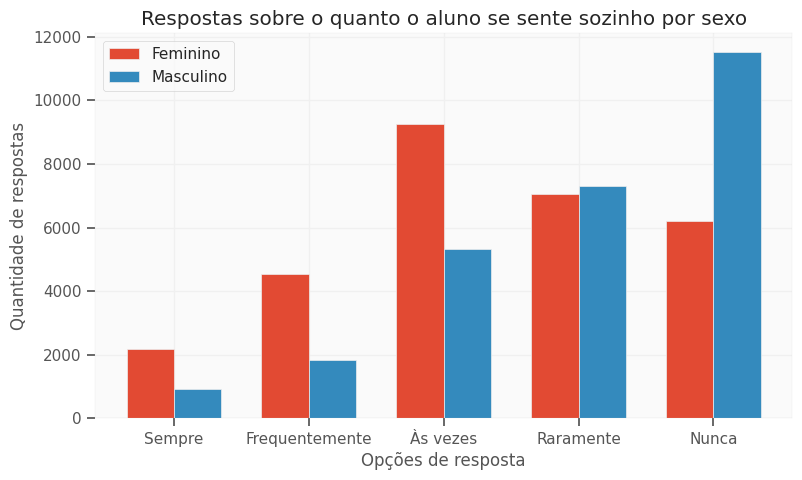

In [340]:
result = dados.groupby('Felt_lonely')['Sexo'].value_counts().to_frame()
result = result.unstack()
result.sort_index(key=lambda x : pd.Categorical(x, categories=name_order),inplace=True)
data = np.array(result.values)

# define os labels para os x-axis e as barras
labels = result.index
bar_labels = ['Feminino', 'Masculino']

# Número de barras e larguras
num_bars = len(labels)
bar_width = 0.35

# criando a figura e os axes
fig, ax = plt.subplots(figsize = (9, 5))

# Loop through each gender and create a set of bars for each value of Felt_lonely
for i in range(len(bar_labels)):
    ax.bar(np.arange(num_bars) + i*bar_width, data[:, i], width=bar_width, label=bar_labels[i])

# Definindo títulos e labels
ax.set_title('Respostas sobre o quanto o aluno se sente sozinho por sexo')
ax.set_xlabel('Opções de resposta')
ax.set_ylabel('Quantidade de respostas')
ax.set_xticks(np.arange(num_bars) + bar_width/2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

➡ Nota-se que os alunos do sexo feminino se sentem mais sozinhos em relação aos do sexo masculino, esse fator, além da maior presença entre os participantes, pode ter alguma relação com mais casos de bullying entre alunas, uma vez que se sentir só pode ser parte da causa e efeito do bullying.

### 10º Gráfico - Relação de casos de bullying com solidão dos alunos e falta de entendimento dos pais sobre os problemas

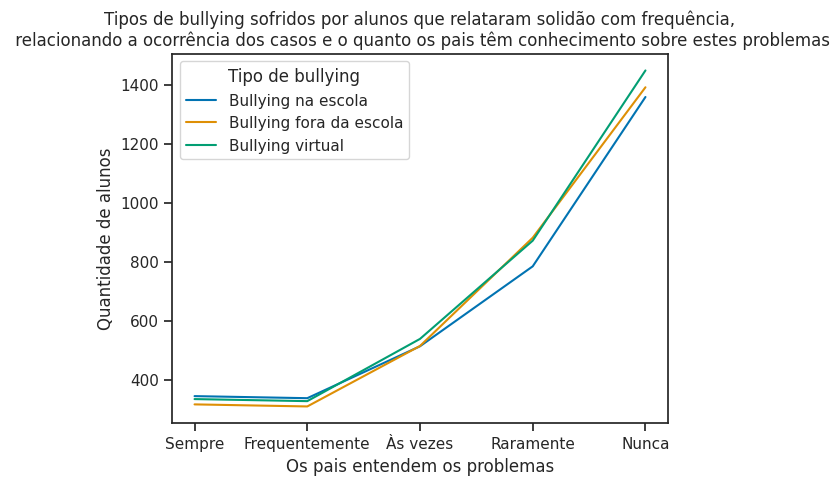

In [341]:
dados_sente_sozinho = dados[(dados['Felt_lonely'] == 'Sempre') | (dados['Felt_lonely'] == 'Frequentemente')]
dados_sente_sozinho['Bullying na escola'].value_counts(normalize = True).to_frame().style.format('{:.2%}')

dados_ss_grouped_add_agg = dados_sente_sozinho.groupby(['Pais entendem']).agg({'Bullying na escola': lambda x: (x == 'Yes').sum(),
            'Bullying fora da escola': lambda x: (x == 'Yes').sum(),
            'Bullying virtual': lambda x: (x == 'Yes').sum()})

name_order = ['Sempre', 'Frequentemente', 'Às vezes', 'Raramente', 'Nunca']
dados_ss_grouped_add_agg = dados_ss_grouped_add_agg.sort_values(by='Pais entendem', key=lambda x: pd.Categorical(x, categories=name_order))

# usando os dados do agupamento e agregação para criar um dicionário
data = {'Pais entendem': dados_ss_grouped_add_agg.index,
        'Bullying na escola': dados_ss_grouped_add_agg['Bullying na escola'].values,
        'Bullying fora da escola': dados_ss_grouped_add_agg['Bullying fora da escola'].values,
        'Bullying virtual': dados_ss_grouped_add_agg['Bullying virtual'].values}

# converter os dados para um formato organizado
df = pd.melt(pd.DataFrame(data), id_vars='Pais entendem',var_name='Tipo de bullying', value_name='Count')

# criando gráfico de linhas usando seaborn
sns.set(style='ticks', palette='colorblind')
sns.lineplot(data=df, x='Pais entendem', y='Count', hue='Tipo de bullying')

plt.title('Tipos de bullying sofridos por alunos que relataram solidão com frequência,\n relacionando a ocorrência dos casos e o quanto os pais têm conhecimento sobre estes problemas')
plt.xlabel('Os pais entendem os problemas')
plt.ylabel('Quantidade de alunos')

plt.show()

➡ Aqui podemos observar que a falta de entendimento dos pais sobre os problemas dos filhos que relataram solidão, está diretamente relacionada com a maior incidência de bullying, seja na escola, fora dela ou virtualmente.

### 11º Gráfico - Influência do porte físico nos casos de bullying

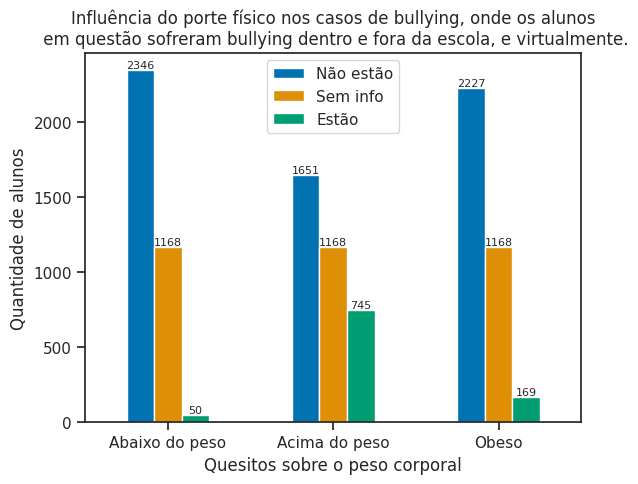

In [342]:
all_bullying_df = dados.loc[(dados['Bullying na escola'] == 'Yes') & (dados['Bullying fora da escola'] == 'Yes') & (dados['Bullying virtual'] == 'Yes')]
result = all_bullying_df[['Abaixo do peso','Acima do peso','Obeso']].apply(pd.value_counts, dropna=False)
result = result.T
result = result.rename(columns={'No': 'Não estão',np.nan: 'Sem info','Yes': 'Estão'})

# plotando um grafico a partir da estrutura de dados
ax = result.plot(kind='bar', rot=0)

# definindo títulos
plt.title('Influência do porte físico nos casos de bullying, onde os alunos\n em questão sofreram bullying dentro e fora da escola, e virtualmente.')
plt.xlabel('Quesitos sobre o peso corporal')
plt.ylabel('Quantidade de alunos')

# adiciona labels nas barras
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8)

plt.show()

➡ Entre os alunos que sofreram bullying nos 3 ambientes, esses fatores relacionados ao peso corporal parecem não ter muita relevância.

### 12º Gráfico - Histograma de frequência de ocorrência de ataques fisicos.

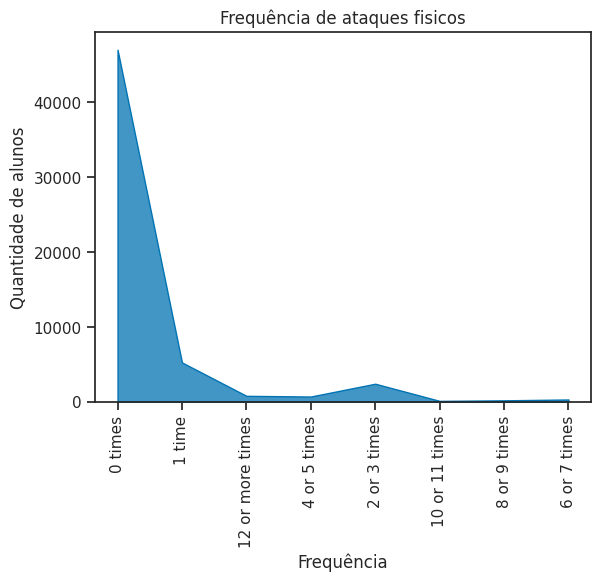

In [343]:
# mapping = {'0 times': 0, '1 time': 1, '2 or 3 times': 2, '4 or 5 times': 3, '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7}

sns.histplot(data=dados, x="Atacado fisicamente",element="poly")
plt.xticks(rotation=90)
plt.xlabel("Frequência")
plt.ylabel("Quantidade de alunos")
plt.title("Frequência de ataques fisicos")

plt.show()

## Criando um dataset sem missings

In [350]:
# removendo as linhas com missing e criando um novo dataframe
dados_completos = dados.dropna(how='any')
dados_completos.head()

# dividindo os dados em treino e teste para futuro uso com machine learning
train_data, test_data = train_test_split(dados_completos, test_size=0.2, random_state=42)

,Bullying na escola,Bullying fora da escola,Bullying virtual,Idade,Sexo,Atacado fisicamente,Luta física,Felt_lonely,Close_friends,Qtd faltas sem permissão,Alunos gentis,Pais entendem,Se sente muito sozinho,Falta sem permissão,Abaixo do peso,Acima do peso,Obeso,amount_attacks
10198,No,No,No,16,Female,0 times,0 times,Raramente,3,0 days,Sometimes,Frequentemente,No,No,No,No,No,0.0
51987,No,No,No,17,Male,0 times,2 or 3 times,Raramente,2,0 days,Rarely,Frequentemente,No,No,No,No,No,0.0
33231,Yes,No,No,15,Female,0 times,0 times,Às vezes,2,0 days,Rarely,Sempre,No,No,No,Yes,Yes,0.0
22968,Yes,No,No,13,Male,0 times,0 times,Nunca,3,0 days,Sometimes,Às vezes,No,No,No,No,No,0.0
28847,No,No,No,14,Male,0 times,0 times,Nunca,3,0 days,Always,Sempre,No,No,No,Yes,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,Yes,Yes,No,15,Male,0 times,0 times,Às vezes,3,0 days,Rarely,Às vezes,No,No,No,No,No,0.0
2464,No,No,No,14,Female,0 times,0 times,Frequentemente,1,0 days,Sometimes,Raramente,Yes,No,No,Yes,Yes,0.0
24494,No,Yes,No,13,Female,0 times,0 times,Nunca,3,0 days,Always,Sempre,No,No,No,No,No,0.0
14840,No,No,Yes,16,Male,0 times,1 time,Às vezes,3,0 days,Sometimes,Às vezes,No,No,No,No,No,0.0
